# WeatherPy
----

### Analysis

1. As expected, cities near the equator experience the highest maximum temperature. As latitude increases, temperature decreases. 

2. There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.

3. There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Build query URL
base_url = f"http://api.openweathermap.org/data/2.5/weather?&appid={api_key}&q="


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
(len(cities))

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

#Create empty lists to form scatter plot dataframe

city_name = []
max_temperature = []
humidity = []
cloudiness = []
windspeed = []
latitude = []
longitude = []
country = []
date = []

counter = 0 
set_number = 1

print(f'Beginning Data Retrieval')
print(f'----------------------------------')

#Create loop through full cities list to get weather info

for city in cities: 
    city_weather_url = base_url + city
    response = requests.get(city_weather_url + "&units=imperial").json()
    
    try:
        
        date.append(response['dt'])
        country.append(response['sys']['country'])
        city_name.append(response['name'])
        longitude.append(response['coord']['lon'])
        latitude.append(response['coord']['lat'])
        max_temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        print(f"Processing record {counter} of set {set_number}|{city}")
         
        if  counter > 50:
            counter = 1
            set_number += 1
            city_name.append(city)
        else:
            counter += 1
            city_name.append(city)
    except:
        # Append null values
        print(f"City not found.  Skipping..")
        pass

print("-----------------------------")
print("Data Retrieval Complete") 
print("-----------------------------")
                                
                                        
                                        

Beginning Data Retrieval
----------------------------------
Processing record 0 of set 1|sao gabriel da cachoeira
City not found.  Skipping..
Processing record 1 of set 1|katsuura
Processing record 2 of set 1|mahebourg
Processing record 3 of set 1|busselton
Processing record 4 of set 1|makakilo city
Processing record 5 of set 1|upernavik
Processing record 6 of set 1|waingapu
Processing record 7 of set 1|saskylakh
Processing record 8 of set 1|korla
Processing record 9 of set 1|barrow
Processing record 10 of set 1|avarua
Processing record 11 of set 1|fortuna
Processing record 12 of set 1|kirakira
Processing record 13 of set 1|nirasaki
Processing record 14 of set 1|punta arenas
Processing record 15 of set 1|uppsala
Processing record 16 of set 1|mataura
Processing record 17 of set 1|new norfolk
Processing record 18 of set 1|bengkulu
Processing record 19 of set 1|rikitea
Processing record 20 of set 1|meulaboh
Processing record 21 of set 1|cockburn town
Processing record 22 of set 1|staryy n

Processing record 41 of set 4|ribeira grande
Processing record 42 of set 4|brae
Processing record 43 of set 4|mananjary
Processing record 44 of set 4|tairua
Processing record 45 of set 4|pinega
Processing record 46 of set 4|fare
Processing record 47 of set 4|te anau
Processing record 48 of set 4|jieshou
City not found.  Skipping..
Processing record 49 of set 4|talnakh
Processing record 50 of set 4|itaituba
Processing record 51 of set 4|mangan
Processing record 1 of set 5|bilma
Processing record 2 of set 5|albanel
Processing record 3 of set 5|kattivakkam
Processing record 4 of set 5|alta floresta
Processing record 5 of set 5|dikson
Processing record 6 of set 5|pisco
Processing record 7 of set 5|yeniseysk
Processing record 8 of set 5|hobart
Processing record 9 of set 5|ranong
Processing record 10 of set 5|price
City not found.  Skipping..
Processing record 11 of set 5|popondetta
Processing record 12 of set 5|port lincoln
Processing record 13 of set 5|torbay
Processing record 14 of set 5|

Processing record 31 of set 8|manado
Processing record 32 of set 8|padang
Processing record 33 of set 8|santa cruz
Processing record 34 of set 8|sioux lookout
Processing record 35 of set 8|bitung
Processing record 36 of set 8|lebu
Processing record 37 of set 8|surovatikha
Processing record 38 of set 8|mount gambier
City not found.  Skipping..
Processing record 39 of set 8|tanout
Processing record 40 of set 8|discovery bay
Processing record 41 of set 8|najran
City not found.  Skipping..
Processing record 42 of set 8|shingu
Processing record 43 of set 8|berdigestyakh
Processing record 44 of set 8|erzin
Processing record 45 of set 8|batagay
Processing record 46 of set 8|saeby
Processing record 47 of set 8|paka
Processing record 48 of set 8|lumphat
Processing record 49 of set 8|mahabad
Processing record 50 of set 8|sadri
Processing record 51 of set 8|havoysund
Processing record 1 of set 9|orumiyeh
Processing record 2 of set 9|trinidad
Processing record 3 of set 9|sarangani
Processing recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create Weather Dataframe
weather_df = pd.DataFrame({

    'Cloudiness': cloudiness,
    'Humidity': humidity,
    'Latitude': latitude,
    'Longitude': longitude,
    'Temperature': max_temperature,
    'Windspeed': windspeed,
    'Country': country,
    'Date': date,
    
})
weather_df

,Cloudiness,Humidity,Latitude,Longitude,Temperature,Windspeed,Country,Date
0,100,91,-0.13,-67.09,76.10,2.21,BR,1605699272
1,20,88,35.13,140.30,66.00,9.17,JP,1605699272
2,75,69,-20.41,57.70,77.00,11.41,MU,1605699272
3,40,80,-33.65,115.33,58.42,8.12,AU,1605699273
4,1,83,21.35,-158.09,77.00,10.42,US,1605698990
...,...,...,...,...,...,...,...,...
547,0,65,29.27,82.18,38.97,3.20,NP,1605699362
548,97,88,-21.04,-40.82,75.18,7.31,BR,1605699362
549,90,86,39.18,-84.53,34.00,3.36,US,1605699362
550,12,92,26.19,107.51,63.88,5.44,CN,1605699363


In [6]:
weather_df.count()

Cloudiness     552
Humidity       552
Latitude       552
Longitude      552
Temperature    552
Windspeed      552
Country        552
Date           552
dtype: int64

In [7]:
#Output data to CSV
weather_df.to_csv('weather_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

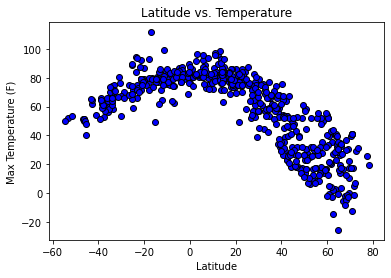

In [47]:
plt.scatter(weather_df["Latitude"],weather_df["Temperature"],edgecolors="black",facecolors="blue")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Lat vs Temp Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

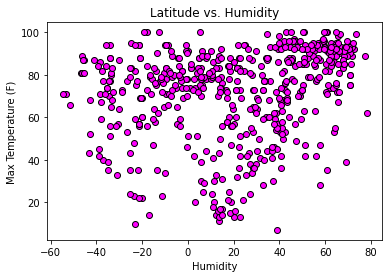

In [9]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],edgecolors="black",facecolors="magenta")
plt.title("Latitude vs. Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Max Temperature (F)")

plt.savefig("Lat vs Humid Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

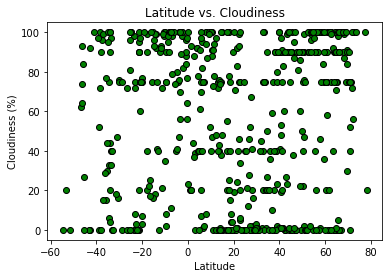

In [30]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],edgecolors="black",facecolors="green")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Lat vs Cloudiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

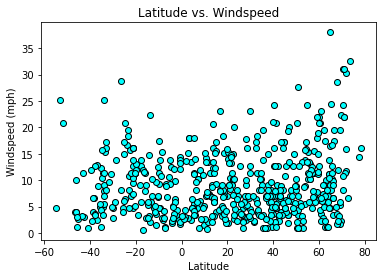

In [46]:
plt.scatter(weather_df["Latitude"],weather_df["Windspeed"],edgecolors="black",facecolors="cyan")
plt.title("Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

plt.savefig("Lat vs Windspeed Plot.png")
plt.show()

In [12]:
#Create Northern and Southern Hemisphere Dataframes
northern_hem = weather_df[(weather_df["Latitude"] >= 0)]
southern_hem = weather_df[(weather_df["Latitude"] < 0)]

northern_hem.head()

,Cloudiness,Humidity,Latitude,Longitude,Temperature,Windspeed,Country,Date
1,20,88,35.13,140.30,66.00,9.17,JP,1605699272
4,1,83,21.35,-158.09,77.00,10.42,US,1605698990
5,100,92,72.79,-56.15,29.10,6.62,GL,1605699273
7,72,93,71.92,114.08,4.96,11.70,RU,1605699273
8,83,68,41.76,86.15,38.86,9.10,CN,1605699273


In [13]:
#Linear Regression for Lat vs Temp - Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hem['Latitude'], northern_hem['Temperature'])
x_values = northern_hem['Latitude']
regress_values = slope * x_values + intercept

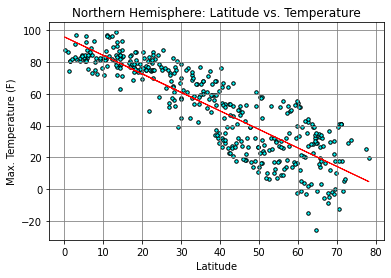

In [14]:
#Plot Linear Regression for Lat vs Temp - Northern Hemisphere
plt.scatter(northern_hem.Latitude, northern_hem.Temperature, s=12, edgecolors="black",facecolors="cyan")
plt.plot(x_values, regress_values, linewidth = 1, color="red")

plt.grid(axis='both',color='grey')
plt.title('Northern Hemisphere: Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)') 
                                                                                                                                                         
plt.savefig('N. Hem Lat vs Temp.png')

plt.show()                         

In [15]:
#Linear Regression for Lat vs Temp - Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hem['Latitude'], southern_hem['Temperature'])
x_values = southern_hem['Latitude']
regress_values = slope * x_values + intercept


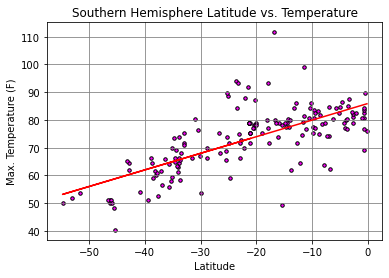

In [16]:
#Plot Linear Regression for Lat vs Temp - Southern Hemisphere
plt.scatter(southern_hem.Latitude,southern_hem.Temperature,s=12, edgecolors="black",facecolors="magenta")
plt.plot(x_values, regress_values, color="red")

plt.grid(axis='both',color='grey')
plt.title('Southern Hemisphere Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')

#SAve .png
plt.savefig('S. Hem Lat vs Temp.png')

plt.show()     

In [42]:
#Linear Regression for Lat vs Humidity - Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hem['Latitude'], southern_hem['Humidity'])
xval = southern_hem['Latitude']
regress_values = slope * xval + intercept

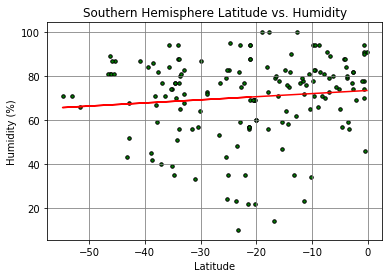

In [43]:
#Plot Linear Regression for Lat vs Humidity - Southern Hemisphere
plt.scatter(southern_hem.Latitude,southern_hem.Humidity,s=12, edgecolors="black",facecolors="green")
plt.plot(xval, regress_values, color="red")

plt.grid(axis='both',color='grey')
plt.title('Southern Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#SAve .png
plt.savefig('S. Hem Lat vs Humidity.png')

plt.show() 

In [19]:
#Linear Regression for Lat vs Humidity - Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hem['Latitude'], northern_hem['Humidity'])
xval = northern_hem['Latitude']
regress_values = slope * xval + intercept


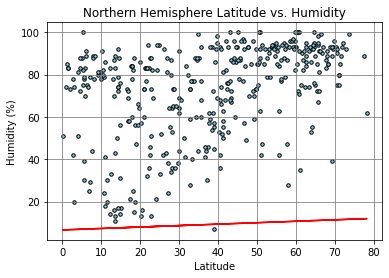

In [33]:
#Plot Linear Regression for Lat vs Humidity - Northern Hemisphere
plt.scatter(northern_hem.Latitude,northern_hem.Humidity,s=12, edgecolors="black",facecolors="skyblue")
plt.plot(xval, regress_values, color="red")

plt.grid(axis='both',color='grey')
plt.title('Northern Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#SAve .png
plt.savefig('N. Hem Lat vs Humidity.png')

plt.show() 

In [21]:
#Linear Regression for Lat vs Cloudiness - Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hem['Latitude'], northern_hem['Cloudiness'])
xval = northern_hem['Latitude']
regress_values = slope * xval + intercept

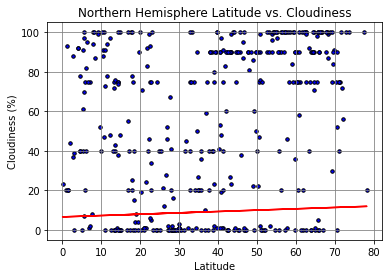

In [34]:
#Plot Linear Regression for Lat vs Cloudiness - Northern Hemisphere
plt.scatter(northern_hem.Latitude,northern_hem.Cloudiness,s=12, edgecolors="black",facecolors="blue")
plt.plot(xval, regress_values, color="red")

plt.grid(axis='both',color='grey')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#SAve .png
plt.savefig('N. Hem Lat vs Cloudiness.png')

plt.show() 

In [44]:
#Linear Regression for Lat vs Cloudiness - Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hem['Latitude'], southern_hem['Cloudiness'])
xval = southern_hem['Latitude']
regress_values = slope * xval + intercept

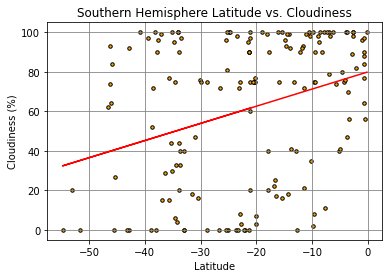

In [45]:
#Plot Linear Regression for Lat vs Cloudiness - Southern Hemisphere
plt.scatter(southern_hem.Latitude,southern_hem.Cloudiness,s=12, edgecolors="black",facecolors="orange")
plt.plot(xval, regress_values, color="red")

plt.grid(axis='both',color='grey')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#SAve .png
plt.savefig('S. Hem Lat vs Cloudiness.png')

plt.show() 

In [40]:
#Linear Regression for Lat vs Windspeed - Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hem['Latitude'], southern_hem['Windspeed'])
xval = southern_hem['Latitude']
regress_values = slope * xval + intercept

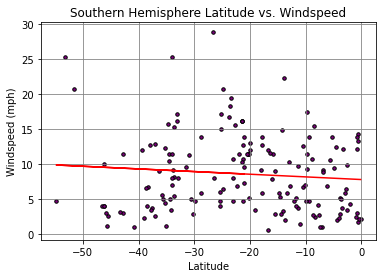

In [41]:
#Plot Linear Regression for Lat vs Windspeed - Southern Hemisphere
plt.scatter(southern_hem.Latitude,southern_hem.Windspeed,s=12, edgecolors="black",facecolors="purple")
plt.plot(xval, regress_values, color="red")

plt.grid(axis='both',color='grey')
plt.title('Southern Hemisphere Latitude vs. Windspeed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')

#SAve .png
plt.savefig('S. Hem Lat vs Windspeed.png')

plt.show() 

In [27]:
#Linear Regression for Lat vs Windspeed - Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hem['Latitude'], northern_hem['Windspeed'])
xval = northern_hem['Latitude']
regress_values = slope * xval + intercept

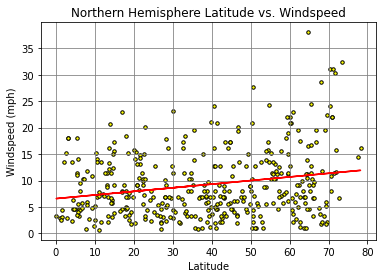

In [37]:
#Plot Linear Regression for Lat vs Windspeed - Northern Hemisphere
plt.scatter(northern_hem.Latitude,northern_hem.Windspeed,s=12, edgecolors="black",facecolors="yellow")
plt.plot(xval, regress_values, color="red")

plt.grid(axis='both',color='grey')
plt.title('Northern Hemisphere Latitude vs. Windspeed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')

#SAve .png
plt.savefig('N. Hem Lat vs Windspeed.png')

plt.show() 